<a href="https://colab.research.google.com/github/Shikha098/python-assignment/blob/main/clustering0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. What is unsupervised learning in the context of machine learning?

Unsupervised learning is a type of machine learning where the model finds patterns or structures in data without using labeled outcomes. Clustering and dimensionality reduction are common examples.

2. How does the K-Means clustering algorithm work?

K-Means partitions data into K clusters by randomly initializing K centroids, assigning points to the nearest centroid, and updating centroids based on the mean of assigned points. This repeats until the centroids stop changing significantly.

3. Explain the concept of a dendrogram in hierarchical clustering.

A dendrogram is a tree-like diagram that shows the order and distances at which clusters are merged or split in hierarchical clustering, helping to visualize the cluster hierarchy.

4. What is the main difference between K-Means and Hierarchical Clustering?

K-Means requires a predefined number of clusters and is faster, while Hierarchical Clustering doesn't need the number of clusters beforehand and builds a tree of clusters.

5. What are the advantages of DBSCAN over K-Means?

DBSCAN can find clusters of arbitrary shape, handles noise/outliers well, and doesn’t require specifying the number of clusters in advance.

6 When would you use Silhouette Score in clustering?

Use the Silhouette Score to evaluate how well data points fit within their assigned clusters — it helps assess the quality of clustering.

7 What are the limitations of Hierarchical Clustering?

It’s computationally expensive, doesn’t scale well with large datasets, and once clusters are merged or split, they can't be undone.

8 Why is feature scaling important in clustering algorithms like K-Means?

K-Means uses distance calculations; without scaling, features with larger ranges dominate and distort clustering results.



9 How does DBSCAN identify noise points?

Points that don’t have enough neighbors within a specified radius (ε) and aren’t part of any cluster are marked as noise.

10 Define inertia in the context of K-Means.

Inertia is the sum of squared distances between data points and their assigned cluster centroids; lower inertia indicates tighter clusters.


11 What is the elbow method in K-Means clustering?

The elbow method plots inertia against different K values. The "elbow" point where the drop slows indicates the optimal number of clusters.

12 Describe the concept of "density" in DBSCAN.

Density refers to the number of points within a given radius (ε). A high-density region means many points are close together and can form a cluster.

13 Can hierarchical clustering be used on categorical data?

Yes, using appropriate distance measures like Hamming or Jaccard, but standard hierarchical clustering is better suited for numerical data.

14) What does a negative Silhouette Score indicate?

It means a data point may be assigned to the wrong cluster, as it's closer to a neighboring cluster than its own.

15. Explain the term "linkage criteria" in hierarchical clustering.

Linkage criteria determine how distances between clusters are calculated when merging them — common types include single, complete, and average linkage.

16. Why might K-Means clustering perform poorly on data with varying cluster sizes or densities?

K-Means assumes all clusters are spherical, equally sized, and have similar densities. When the actual data contains clusters with different shapes, sizes, or densities, K-Means may assign points incorrectly. It minimizes the sum of squared distances to centroids, which can lead to poor results if one large or dense cluster influences the centroid positions. It also struggles with outliers and non-globular clusters. Therefore, its performance declines in complex clustering scenarios.

17) What are the core parameters in DBSCAN, and how do they influence clustering?

DBSCAN uses two key parameters: eps (the radius of the neighborhood) and minPts (minimum number of points within eps to form a dense region). A point is considered a core point if it has at least minPts neighbors within eps. These parameters determine how the algorithm detects dense clusters and labels other points as noise. If eps is too small, most points may be labeled noise; if too large, distinct clusters may merge.

18) How does K-Means++ improve upon standard K-Means initialization?

K-Means++ improves the selection of initial centroids to enhance clustering performance. Instead of choosing them randomly, it picks the first centroid randomly and then selects subsequent centroids based on their distance from already chosen ones, favoring distant points. This approach spreads the initial centroids out across the data space, reducing the chances of poor convergence and local minima. It usually leads to faster and more accurate clustering than standard K-Means.

19) What is agglomerative clustering?

Agglomerative clustering is a bottom-up approach to hierarchical clustering. Initially, each data point is treated as its own cluster. The algorithm then repeatedly merges the two closest clusters based on a chosen distance metric (like single, complete, or average linkage). This process continues until all points are merged into one cluster or a stopping criterion is met. The result can be visualized using a dendrogram, showing the hierarchy of merges.

20) What makes Silhouette Score a better metric than just inertia for model evaluation?

Silhouette Score evaluates both cohesion (how close a point is to its own cluster) and separation (how far it is from other clusters), giving a more balanced view of clustering quality. Inertia, on the other hand, only measures compactness within clusters and doesn’t consider how well-separated the clusters are. Thus, a low inertia doesn’t always mean good clustering. Silhouette Score ranges from -1 to 1, helping clearly interpret clustering effectiveness.

**PRACTICAL QUESTION **

Q21) Generate synthetic data with 4 centers using make_blobs and apply K-Means clustering. Visualize using a scatter plot



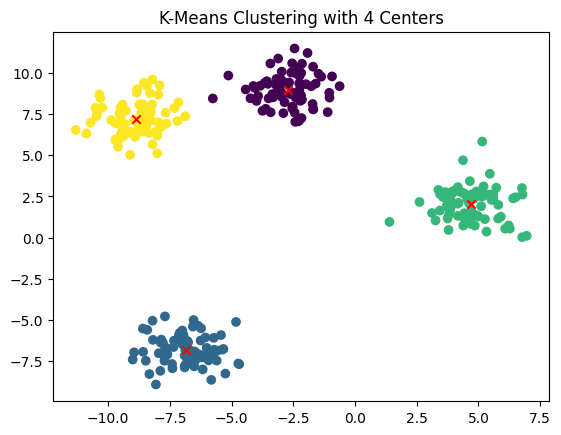

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=300, centers=4, random_state=42)
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='red', marker='x')
plt.title("K-Means Clustering with 4 Centers")
plt.show()

Q22) Load the Iris dataset and use Agglomerative Clustering to group the data into 3 clusters. Display the first 10 predicted labels


In [ ]:
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

iris = load_iris()
X = iris.data
agg = AgglomerativeClustering(n_clusters=3)
labels = agg.fit_predict(X)

print("First 10 predicted labels:", labels[:10])

First 10 predicted labels: [1 1 1 1 1 1 1 1 1 1]


Q23) Generate synthetic data using make_moons and apply DBSCAN. Highlight outliers in the plot

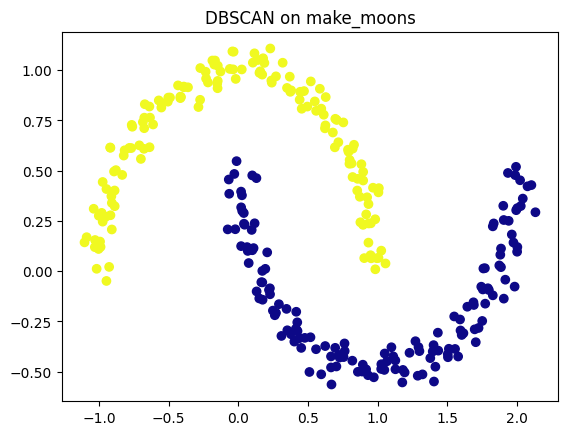

In [ ]:
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
import numpy as np

X, _ = make_moons(n_samples=300, noise=0.05, random_state=42)
dbscan = DBSCAN(eps=0.3, min_samples=5)
labels = dbscan.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='plasma', marker='o')
plt.title("DBSCAN on make_moons")
plt.show()

Q24) Load the Wine dataset and apply K-Means clustering after standardizing the features. Print the size of each cluster

In [ ]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

wine = load_wine()
X = StandardScaler().fit_transform(wine.data)

kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)

unique, counts = np.unique(labels, return_counts=True)
print("Cluster sizes:", dict(zip(unique, counts)))

Cluster sizes: {np.int32(0): np.int64(65), np.int32(1): np.int64(51), np.int32(2): np.int64(62)}


Q25) Use make_circles to generate synthetic data and cluster it using DBSCAN. Plot the result

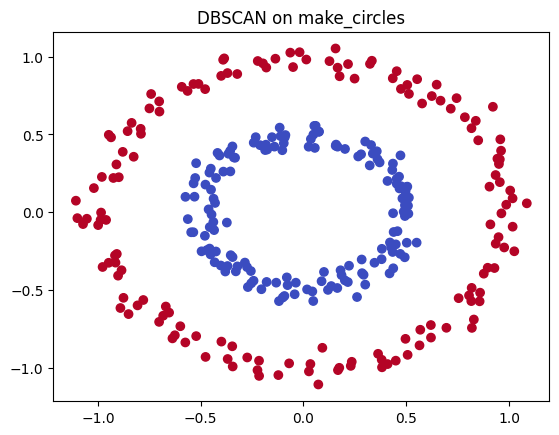

In [ ]:
from sklearn.datasets import make_circles

X, _ = make_circles(n_samples=300, factor=0.5, noise=0.05)
dbscan = DBSCAN(eps=0.2, min_samples=5)
labels = dbscan.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='coolwarm')
plt.title("DBSCAN on make_circles")
plt.show()

Q26) Load the Breast Cancer dataset, apply MinMaxScaler, and use K-Means with 2 clusters. Output the cluster centroids

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler

data = load_breast_cancer()
X = MinMaxScaler().fit_transform(data.data)

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)

print("Cluster centroids:\n", kmeans.cluster_centers_)

Cluster centroids:
 [[0.50483563 0.39560329 0.50578661 0.36376576 0.46988732 0.42226302
  0.41838662 0.46928035 0.45899738 0.29945886 0.19093085 0.19112073
  0.17903433 0.13086432 0.18017962 0.25890126 0.12542475 0.30942779
  0.190072   0.13266975 0.48047448 0.45107371 0.4655302  0.31460597
  0.49868817 0.36391461 0.39027292 0.65827197 0.33752296 0.26041387]
 [0.25535358 0.28833455 0.24696416 0.14388369 0.35743076 0.18019471
  0.10344776 0.1306603  0.34011829 0.25591606 0.06427485 0.18843043
  0.05975663 0.02870108 0.18158628 0.13242941 0.05821528 0.18069336
  0.17221057 0.08403996 0.2052406  0.32069002 0.19242138 0.09943446
  0.3571115  0.14873935 0.13142287 0.26231363 0.22639412 0.15437354]]


Q27) Generate synthetic data using make_blobs with varying cluster standard deviations and cluster with DBSCAN

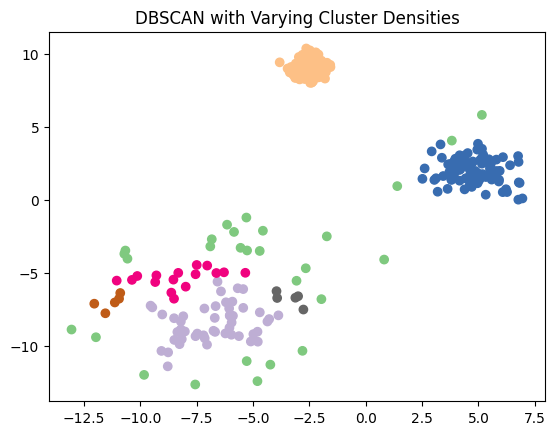

In [ ]:
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=[0.5, 1.0, 2.5], random_state=42)
dbscan = DBSCAN(eps=1.0, min_samples=5)
labels = dbscan.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='Accent')
plt.title("DBSCAN with Varying Cluster Densities")
plt.show()

Q28) Load the Digits dataset, reduce it to 2D using PCA, and visualize clusters from K-Means

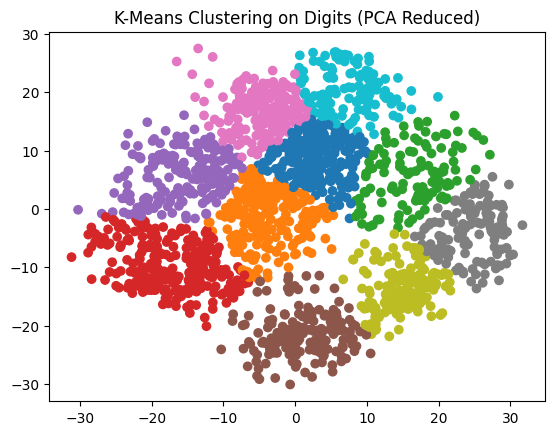

In [ ]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

digits = load_digits()
X = PCA(n_components=2).fit_transform(digits.data)
kmeans = KMeans(n_clusters=10, random_state=42)
labels = kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='tab10')
plt.title("K-Means Clustering on Digits (PCA Reduced)")
plt.show()

Q29) Create synthetic data using make_blobs and evaluate silhouette scores for k = 2 to 5. Display as a bar chart

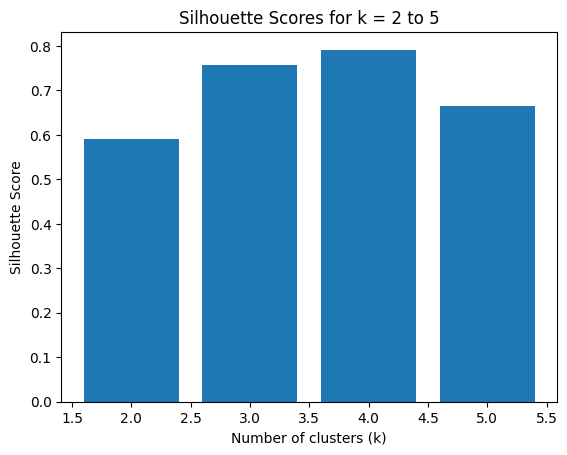

In [ ]:
from sklearn.metrics import silhouette_score

X, _ = make_blobs(n_samples=300, centers=4, random_state=42)
scores = []

for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    scores.append(score)

plt.bar(range(2, 6), scores)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title("Silhouette Scores for k = 2 to 5")
plt.show()

Q30) Load the Iris dataset and use hierarchical clustering to group data. Plot a dendrogram with average linkage

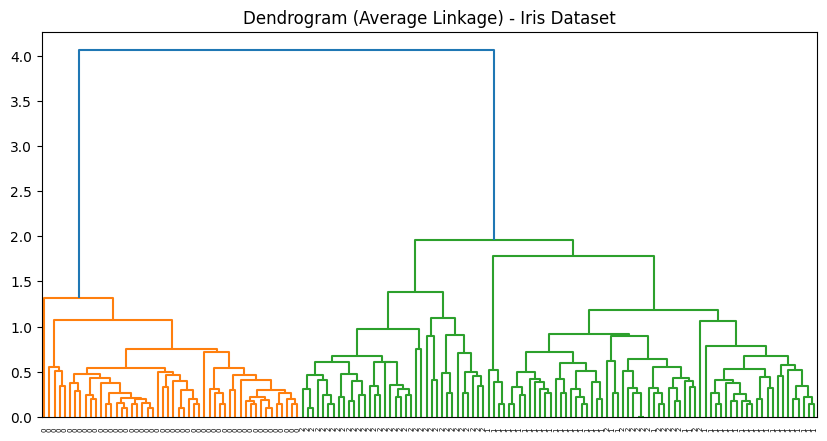

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

iris = load_iris()
linked = linkage(iris.data, method='average')

plt.figure(figsize=(10, 5))
dendrogram(linked, labels=iris.target, leaf_rotation=90)
plt.title("Dendrogram (Average Linkage) - Iris Dataset")
plt.show()

Q31) Generate synthetic data with overlapping clusters using make_blobs, then apply K-Means and visualize with decision boundaries

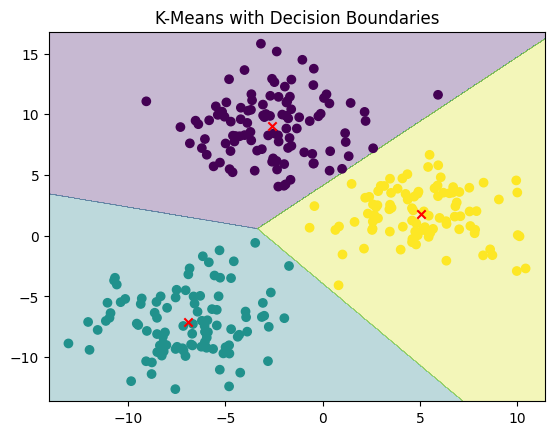

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

X, _ = make_blobs(n_samples=300, centers=3, cluster_std=2.5, random_state=42)
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)

# Plot decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='red', marker='x')
plt.title("K-Means with Decision Boundaries")
plt.show()

Q32) Load the Digits dataset and apply DBSCAN after reducing dimensions with t-SNE. Visualize the results

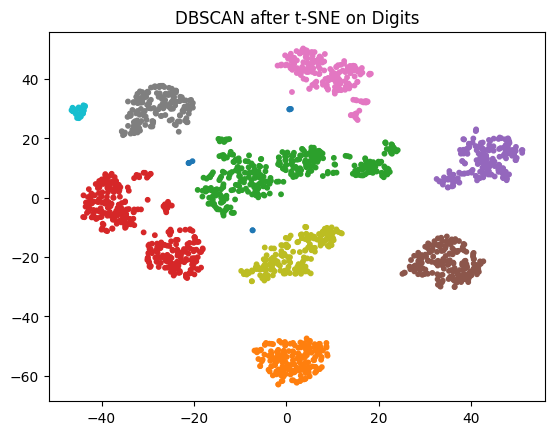

In [ ]:
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN

digits = load_digits()
X_tsne = TSNE(n_components=2, random_state=42).fit_transform(digits.data)
dbscan = DBSCAN(eps=5, min_samples=5)
labels = dbscan.fit_predict(X_tsne)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='tab10', s=10)
plt.title("DBSCAN after t-SNE on Digits")
plt.show()

Q 33) Generate synthetic data using make_blobs and apply Agglomerative Clustering with complete linkage. Plot the result

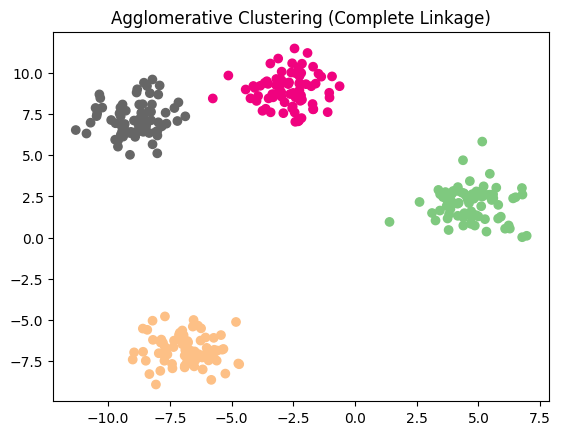

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering

X, _ = make_blobs(n_samples=300, centers=4, random_state=42)
agg = AgglomerativeClustering(n_clusters=4, linkage='complete')
labels = agg.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='Accent')
plt.title("Agglomerative Clustering (Complete Linkage)")
plt.show()

Q34) Load the Breast Cancer dataset and compare inertia values for K = 2 to 6 using K-Means. Show results in a line plot

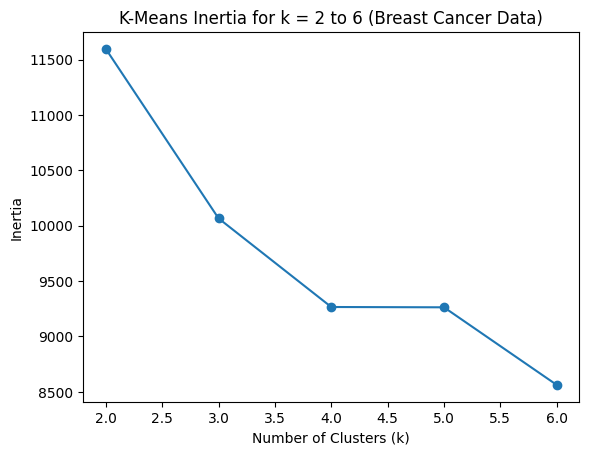

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

data = load_breast_cancer()
X = StandardScaler().fit_transform(data.data)

inertias = []
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

plt.plot(range(2, 7), inertias, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title("K-Means Inertia for k = 2 to 6 (Breast Cancer Data)")
plt.show()

Q36) Generate synthetic concentric circles using make_circles and cluster using Agglomerative Clustering with single linkage

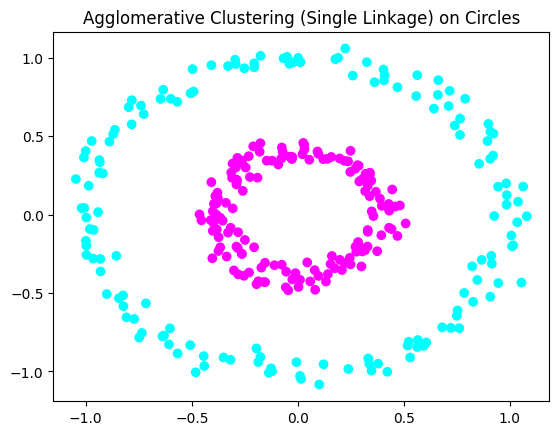

In [ ]:
from sklearn.datasets import make_circles

X, _ = make_circles(n_samples=300, factor=0.4, noise=0.05)
agg = AgglomerativeClustering(n_clusters=2, linkage='single')
labels = agg.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='cool')
plt.title("Agglomerative Clustering (Single Linkage) on Circles")
plt.show()

Q 37) Use the Wine dataset, apply DBSCAN after scaling the data, and count the number of clusters (excluding noise)

In [ ]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

wine = load_wine()
X = StandardScaler().fit_transform(wine.data)

dbscan = DBSCAN(eps=1.2, min_samples=5)
labels = dbscan.fit_predict(X)

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print("Number of clusters (excluding noise):", n_clusters)

Number of clusters (excluding noise): 0


Q38) Generate synthetic data with make_blobs and apply KMeans. Then plot the cluster centers on top of the data points

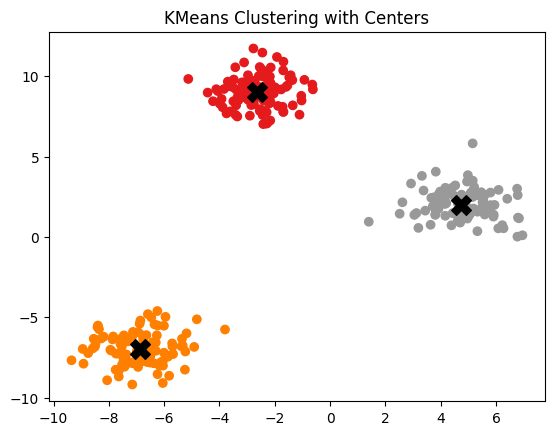

In [ ]:
X, _ = make_blobs(n_samples=300, centers=3, random_state=42)
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='Set1')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='black', marker='X', s=200)
plt.title("KMeans Clustering with Centers")
plt.show()

Q39) Load the Iris dataset, cluster with DBSCAN, and print how many samples were identified as noise

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
X = StandardScaler().fit_transform(iris.data)

dbscan = DBSCAN(eps=0.6, min_samples=4)
labels = dbscan.fit_predict(X)

n_noise = list(labels).count(-1)
print("Number of noise samples in Iris dataset:", n_noise)

Number of noise samples in Iris dataset: 19


Q40) Generate synthetic non-linearly separable data using make_moons, apply K-Means, and visualize the clustering result

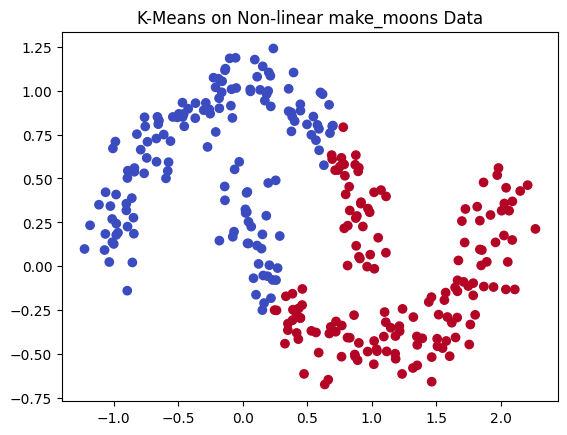

In [ ]:
X, _ = make_moons(n_samples=300, noise=0.1, random_state=42)
kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='coolwarm')
plt.title("K-Means on Non-linear make_moons Data")
plt.show()

Q41) Generate synthetic blobs with 5 centers and apply KMeans. Then use silhouette_score to evaluate the
clustering

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

X, _ = make_blobs(n_samples=500, centers=5, random_state=42)
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(X)

score = silhouette_score(X, labels)
print("Silhouette Score:", score)

Silhouette Score: 0.678738720085253


Q42) Load the Breast Cancer dataset, reduce dimensionality using PCA, and apply Agglomerative Clustering. Visualize in 2D

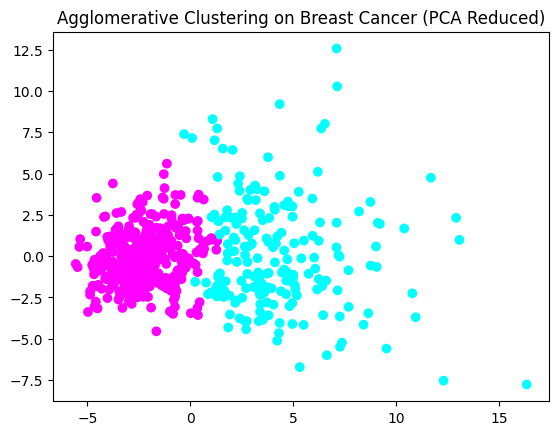

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

data = load_breast_cancer()
X = StandardScaler().fit_transform(data.data)
X_pca = PCA(n_components=2).fit_transform(X)

agg = AgglomerativeClustering(n_clusters=2)
labels = agg.fit_predict(X_pca)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='cool')
plt.title("Agglomerative Clustering on Breast Cancer (PCA Reduced)")
plt.show()

Q43) Generate noisy circular data using make_circles and visualize clustering results from KMeans and DBSCAN
side-by-side

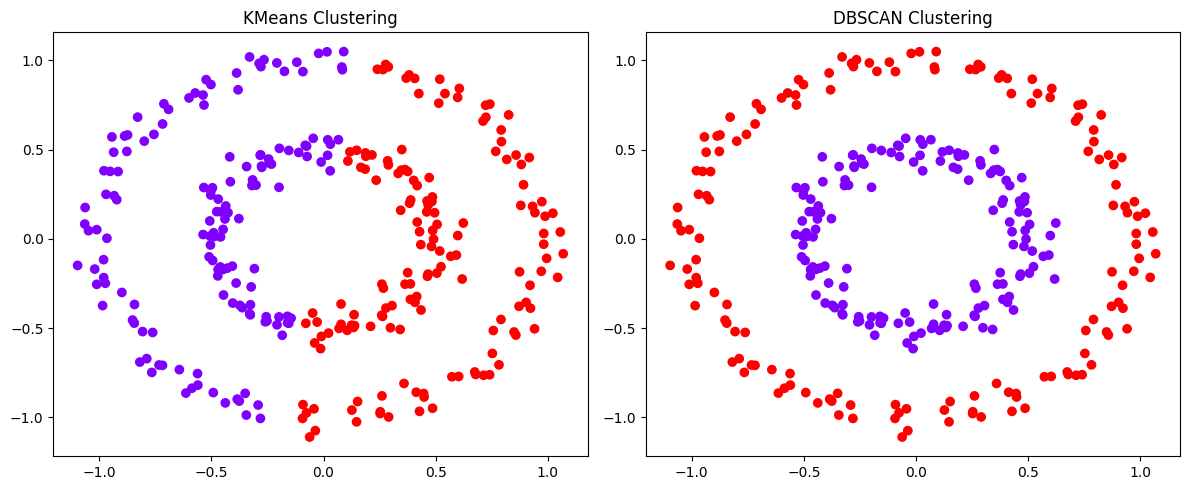

In [ ]:
from sklearn.datasets import make_circles
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt

X, _ = make_circles(n_samples=300, noise=0.05, factor=0.5, random_state=42)

kmeans = KMeans(n_clusters=2, random_state=42).fit_predict(X)
dbscan = DBSCAN(eps=0.2, min_samples=5).fit_predict(X)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=kmeans, cmap='rainbow')
plt.title("KMeans Clustering")

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=dbscan, cmap='rainbow')
plt.title("DBSCAN Clustering")

plt.tight_layout()
plt.show()

 Q44) Load the Iris dataset and plot the Silhouette Coefficient for each sample after KMeans clustering?

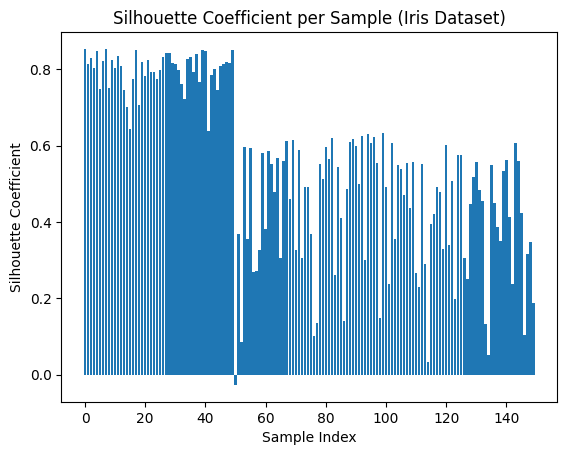

In [ ]:
from sklearn.datasets import load_iris
from sklearn.metrics import silhouette_samples
import matplotlib.pyplot as plt
import numpy as np

iris = load_iris()
X = iris.data
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)

silhouette_vals = silhouette_samples(X, labels)
plt.bar(range(len(silhouette_vals)), silhouette_vals)
plt.title("Silhouette Coefficient per Sample (Iris Dataset)")
plt.xlabel("Sample Index")
plt.ylabel("Silhouette Coefficient")
plt.show()

 Q45) Generate synthetic data using make_blobs and apply Agglomerative Clustering with 'average' linkage.
Visualize clusters

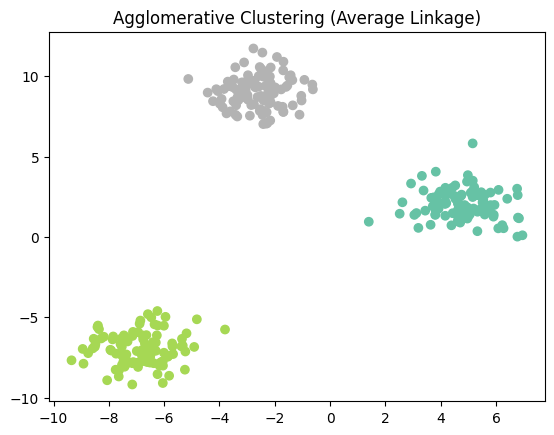

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering

X, _ = make_blobs(n_samples=300, centers=3, random_state=42)
agg = AgglomerativeClustering(n_clusters=3, linkage='average')
labels = agg.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='Set2')
plt.title("Agglomerative Clustering (Average Linkage)")
plt.show()

 Q46) Load the Wine dataset, apply KMeans, and visualize the cluster assignments in a seaborn pairplot (first 4
features)

<ipython-input-26-4342ce87781c>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_subset['cluster'] = kmeans.fit_predict(X_subset)


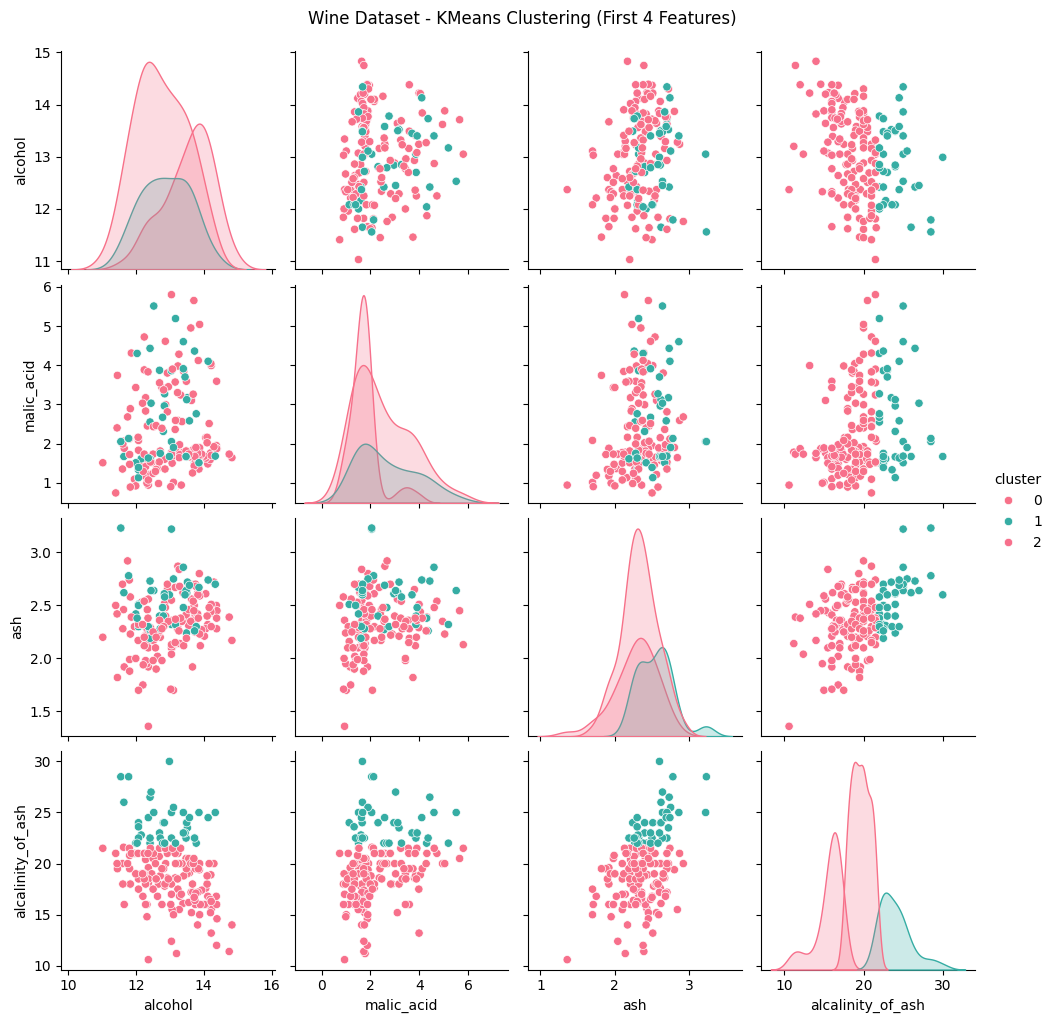

In [ ]:
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load and prepare the dataset
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)

# Select only the first 4 features for clustering and plotting
X_subset = X.iloc[:, :4]

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
X_subset['cluster'] = kmeans.fit_predict(X_subset)

# Plot using seaborn pairplot
sns.pairplot(X_subset, hue='cluster', palette='husl')
plt.suptitle("Wine Dataset - KMeans Clustering (First 4 Features)", y=1.02)
plt.show()

Q47)  Generate noisy blobs using make_blobs and use DBSCAN to identify both clusters and noise points. Print the
count

In [ ]:
X, _ = make_blobs(n_samples=400, centers=4, cluster_std=1.5, random_state=42)
X += np.random.normal(0, 2, X.shape)  # Add noise

dbscan = DBSCAN(eps=2, min_samples=5)
labels = dbscan.fit_predict(X)

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print("Number of clusters:", n_clusters)
print("Number of noise points:", n_noise)

Number of clusters: 2
Number of noise points: 18


Q 48) Load the Digits dataset, reduce dimensions using t-SNE, then apply Agglomerative Clustering and plot the
clusters.

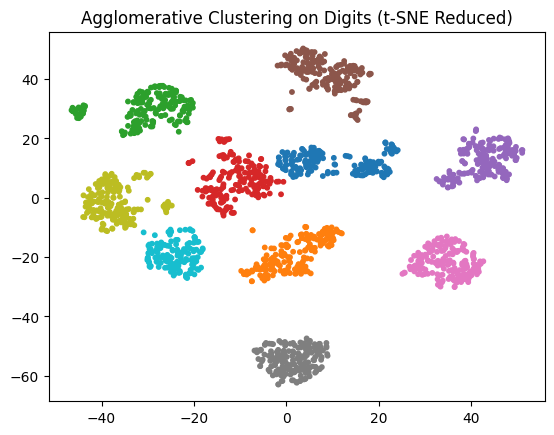

In [ ]:
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE

digits = load_digits()
X = TSNE(n_components=2, random_state=42).fit_transform(digits.data)

agg = AgglomerativeClustering(n_clusters=10)
labels = agg.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='tab10', s=10)
plt.title("Agglomerative Clustering on Digits (t-SNE Reduced)")
plt.show()